# One hidden layer neural network

In [19]:
import numpy as np
from utils import plot_decision_boundary, load_extra_datasets, load_planar_dataset

import sklearn
import sklearn.datasets
import sklearn.linear_model

import matplotlib.pyplot as plt
%matplotlib inline

SEED = 1
np.random.seed(SEED)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [14]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

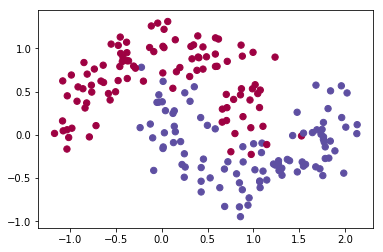

In [16]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

In [18]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print("X shape = {}".format(shape_X))
print("Y shape = {}".format(shape_Y))
print("Number of samples = {}".format(m))

X shape = (2, 200)
Y shape = (1, 200)
Number of samples = 200


## Logistic Regression

In [23]:
LR_model = sklearn.linear_model.LogisticRegressionCV()
LR_model.fit(X.T, Y.T.ravel())

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Accuracy of logistic regression: [87.]


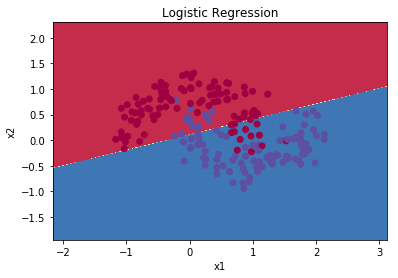

In [24]:
plot_decision_boundary(lambda x: LR_model.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

predictions = LR_model.predict(X.T)

acc = (np.dot(Y, predictions) + np.dot(1 - Y, 1 - predictions)) / Y.size * 100
print("Accuracy of logistic regression: {}".format(acc))

## Neural Network model

$ z^{[1][i]} = W^{[1} x^{(i)} + b^{[1](i)} $

$ a^{[1](i)} = tanh(z^{[1](i)}) $

$ z^{[2][i]} = W^{[2} a^{[1](i)} + b^{[2](i)} $

$ \hat{y}^{(i)} = a^{[2](i)} = \sigma(z^{[2](i)})$

$ y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases} $

### Define the neural network structure